In [11]:
import os
import torch
from torch.utils.data import Dataset
import cv2
from torchvision import transforms, datasets
from torchvision.datasets import CelebA
import os
import torch.nn as nn
import glob
import os
import torch
from torch.utils.data import Dataset
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
import torch
import math
# main libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler
from torch.nn import functional as F
from torch import nn
from torch import optim
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import Dataset
import math
import torchvision.transforms.functional as TF
import cv2
from keras.utils import image_dataset_from_directory
from torchvision import datasets, transforms
from torch.utils.data import random_split
from torch.nn.parameter import Parameter

from torch.nn import init
from torchvision.utils import make_grid
from collections import OrderedDict

import torch
from torch.utils.data import Dataset

from skimage import transform
import skimage.io as io
import numpy as np
from torchvision.utils import save_image

In [2]:
os.getcwd()

'F:\\GitHub\\anomaly-detection\\codes\\Last Research'

In [4]:
device = 'cpu'
os.environ['TORCH_HOME'] = './pretrain_models'
VGG_11 = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11', pretrained=True)
VGG_11 = VGG_11.to(device)

Using cache found in ./pretrain_models\hub\pytorch_vision_v0.10.0


In [5]:
VGG_11
# 1, 4, 7, 9, 12, 14, 17, 19,

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [12]:
class CustomDataset(Dataset):
    def __init__(self, folder:str, img_size = 128, BGR2GRAY = True, transforms = None):
        super(CustomDataset, self).__init__()

        self.folder = folder
        self.img_list  =  os.listdir(folder)
        self.transforms = transforms
        self.img_size = img_size
        self.BGR2GRAY = BGR2GRAY

    def __getitem__(self, item):
        img_dir = os.path.join(self.folder, self.img_list[item])
        img = cv2.imread(img_dir)
        if self.BGR2GRAY:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (self.img_size,self.img_size))

        if self.transforms:
            img = self.transforms(img)

        return img


    def __len__(self):
        return len(self.img_list)

In [13]:
folder = "F:/GitHub/anomaly-detection/dataset/kaggle1/no/normal"

trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,], std=[0.229,])])

dataset = CustomDataset(folder, transforms=trans)
train_loader = DataLoader(dataset, batch_size= 10)

In [76]:
folder = "F:/GitHub/anomaly-detection/dataset/kaggle1/yes/abnormal"

trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,], std=[0.229,])])

dataset = CustomDataset(folder, transforms=trans)
test_loader = DataLoader(dataset, batch_size= 10)

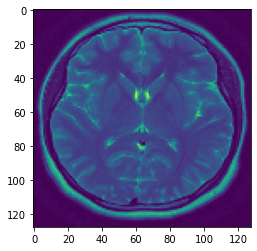

In [18]:
for x in train_loader:
    x=x[0:1]
    break


plt.imshow(x[0][0])

In [ ]:
target_ids = range(len(digits.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [ ]:
VGG_11
# 1, 4, 7, 9, 12, 14, 17, 19,

In [28]:
feat = VGG_11.features[0:2](x.repeat(1,3,1,1))
feat.shape

torch.Size([1, 64, 128, 128])

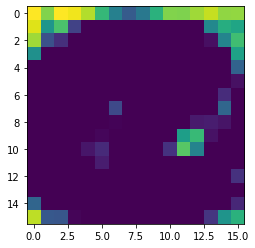

In [75]:
plt.imshow(
VGG_11.features[0:15](x.repeat(1,3,1,1)).detach()[0][7]
)

In [77]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

In [81]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [82]:
X_2d = tsne.fit_transform(X)

B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [214]:
folder = "F:/GitHub/anomaly-detection/dataset/kaggle1/no/normal"

trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,], std=[0.229,])])

dataset = CustomDataset(folder, transforms=trans)
train_loader = DataLoader(dataset, batch_size= dataset.__len__())

In [215]:
for x in train_loader:
    x_normal=x

In [216]:
folder = "F:/GitHub/anomaly-detection/dataset/kaggle1/yes/abnormal"

trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,], std=[0.229,])])

dataset = CustomDataset(folder, transforms=trans)
test_loader = DataLoader(dataset, batch_size= dataset.__len__())

In [217]:
for x in test_loader:
    x_abnormal=x

In [218]:
# 1, 4, 7, 9, 12, 14, 17, 19,
layer = 19

x_normal = VGG_11.features[0:layer+1](x_normal.repeat(1,3,1,1)).detach()
x_abnormal = VGG_11.features[0:layer+1](x_abnormal.repeat(1,3,1,1)).detach()

In [219]:
X = torch.concat((x_normal.flatten(1), x_abnormal.flatten(1)), dim=0)

In [220]:
y = torch.zeros((X.shape[0],1))
y[:x_normal.shape[0]]=1

In [221]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

def tsne(X, y, target_names):
    """
    X : np.array : (N, F)
    y : np.array : (N,)
    target_names : np.array : (N, )
    target_names
    """
    tsne = TSNE(n_components=2, random_state=0)
    X_2d = tsne.fit_transform(X)
    target_ids = range(len(target_names))

    plt.figure(figsize=(6, 5))
    colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
    colors = colors[:len(target_names)]
    for i, c, label in zip(target_ids, colors, digits.target_names):
        plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
    plt.legend()
    plt.show()

B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


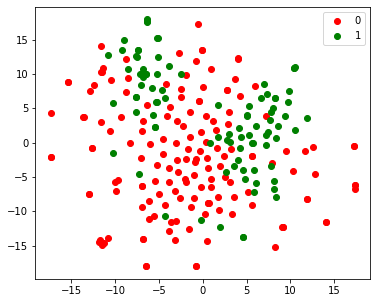

In [222]:
tsne(X, y.squeeze(), np.array(['Normal','Anomal']))

In [145]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [156]:
y.squeeze().shape

torch.Size([246])

In [149]:
digits.target[:500].shape

(500,)

In [148]:
digits.data[:500].shape

(500, 64)

In [150]:
digits.target_names.shape

(10,)

B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


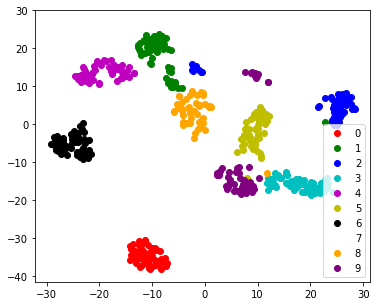

In [91]:
tsne(digits.data[:500], digits.target[:500], digits.target_names)

In [233]:
from math import sin, cos, radians, pi, sqrt

def meteorites(r1, r2, num=1000):
    angle = np.random.uniform(0, 2 * pi, num)  # in radians
    distance = np.sqrt(np.random.uniform(r1, r2, num))

    d1 = distance * np.cos(angle)
    d2 = distance * np.sin(angle)

    return np.concatenate(
        (np.expand_dims(d1,1), np.expand_dims(d2,1)),
        axis=1
    )

In [239]:
X1 = meteorites(2,3,1000)
X2 = meteorites(0,1,1000)

X = np.concatenate((X1, X2), axis=0)

In [243]:
y = torch.zeros((X.shape[0],1))
y[:X1 .shape[0]]=1

B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
B:\Anaconda_install_path\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


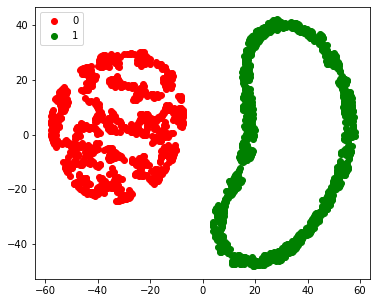

In [244]:
tsne(X, y.squeeze(), np.array(['Normal','Anomal']))